##  Problem: Quantum Eigenvalues in Arbitrary Potential<a id="9.1"></a>

Quantum mechanics describes phenomena that occur on atomic or subatomic
scales (an elementary particle is subatomic). It is a statistical theory in which the
probability that a particle is located in a region *dx* around the point *x* is
${\cal P} = |\psi(x)|^2 dx$, where *ψ*(*x*) is called the *wave function*. If a
particle of definite energy *E* moving in one dimension experiences a potential
*V*(*x*), its wave function is determined by an ordinary differential equation (a
partial differential equation for more than one dimension) known as the
time-independent Schrödinger equation:

$$\tag*{9.1}
\frac{-\hbar^2} {2m} \frac{d^2\psi(x)}{dx^2} + V(x) \psi(x)
= E \psi(x).$$

Although we say we are solving for the energy *E*, in practice we solve
for the wave vector *κ*, where the two are related for bound states by:

$$\tag*{9.2}
\kappa^2 = -\frac{2m}{\hbar^2}E  =  \frac{2m}{\hbar^2}|E| .$$

The Schrödinger equation now takes the form

$$ \frac{d^2\psi(x)}{dx^2}  -  \frac{2m}{\hbar^2} V(x) \psi(x) = \kappa^2 \psi(x).\tag*{9.3}$$

When our problem tells us that the particle is bound, this means that it
is confined to some finite region of space, which implies that *ψ*(*x*)
is normalizeable. The only way for that to happen is if *ψ*(*x*) decay
exponentially as *x* → ±∞ (where the potential vanishes):

$$\tag*{9.4}
\psi(x) \rightarrow\begin{cases}
     e^{-\kappa x}, & \mbox{for }\       x\rightarrow +\infty,\\
     e^{+\kappa x}, & \mbox{for }\              x\rightarrow -\infty.
     \end{cases}$$

In summary, we must also require that the
solution *ψ*(*x*) simultaneously satisfies the boundary conditions
(9.4). This extra condition turns the ODE problem into an *eigenvalue
problem* that has solutions (*eigenvalues*) for only certain values of
the energy *E* or equivalently *κ*. The ground-state energy corresponds
to the smallest (most negative) eigenvalue. The ground-state wave
function (eigenfunction), which we must determine in order to find its
energy, must be nodeless and even (symmetric) about *x* = 0. The excited
states have higher (less negative) energies and wave functions that may
be odd (antisymmetric). We will solve the eigenvalue problem for the Schroedinger equation above using linear algebra via discretization of the functions on a real space one-dimensional grid.

NOTE: this is equivalent to defining a "basis set" for the representation of the potentials and wavefunctions that is comprised of the points on the linear axis of position in 1 dimension (see Fig. 9.2) and discussion below.

###  Model: Nucleon in a Box<a id="9.1.1"></a>

The numerical methods we describe are capable of handling the most
realistic potential shapes. Yet to make a connection with the standard
textbook case and to permit some analytic checking, we will use a simple
model in which the potential *V*(*x*) in (9.1) is a finite square well
(Figure 9.1):

$$\tag*{9.5} V(x) =\begin{cases}
 -V_0 = -83 \mbox{MeV}, & \mbox{for }\ |x|\leq a= 2 \mbox{fm},\\
    0, & \mbox{for } \   |x| \gt a=  2 \mbox{fm},\end{cases}$$

where values of 83 MeV for the depth and 2 fm for the radius are typical for
nuclei (these are the units in which we solve the problem). 
 
To evaluate the ratio of constants here, we insert *c*<sup>2</sup>, the
speed of light squared, into both the numerator and the denominator and
then we obtain these familiar values:

$$\tag*{9.8}
\frac{2m}{\hbar^2} = \frac{2mc^2}{(\hbar c)^2} \simeq
\frac{2\times 940 \mbox{MeV}}{(197.32 \mbox{MeV fm})^2} =
0.0483 \mbox{MeV}^{-1}\ \mbox{fm}^{-2}.$$

![image](Figs/Fig9_1.png)

 **Figure 9.1** Computed wave function and the
square-well potential (bold lines) obtained with a integrator algorithm for ODEs.

### Algorithm: function discretization in real space

![image](Figs/Fig-grid.png)

 **Figure 9.2** grid discretization for the numerical solution of the Shroedinger equation in real space. Eq. 9.1 has to be satisfied at every grid point.

**Expansion of a function in a basis set**
Our approach to the solution of this problem is based on the idea of discrete representation of the Schroedinger equation on a one-dimentional grid of points in real space. In practice, we discretize any function $f(x) = \sum_i c_i \hat{\bf i}$ for $x_{i+1}-x_i = dx$ and $dx$ arbitrarily small. Here $\hat{\bf i}$ are the basis vectors of the N-dimensional space of real space points:

$$ \begin{pmatrix}
1 0 0 0 0 0 0 0 \cdots 0 0 0\\
0 1 0 0 0 0 0 0 \cdots 0 0 0\\
\ddots\\
0 0 0 0 0 0 0 0 \cdots 0 1 0\\
0 0 0 0 0 0 0 0 \cdots 0 0 1
\end{pmatrix} $$

In practice it is an identity matrix of dimension NxN.

Let's rewrite eq. 9.1 as an eigenvalue problem:

$$ [H(x) - \epsilon]~\psi(x) = 0 $$ where $$H(x) = \frac{-\hbar^2} {2m} \frac{d^2}{dx^2} + V(x) $$

and then cast it in matrix form using the representation above.

**the $V(x)$ potential** $V(x)$ is a local function, that is, it depends only on the position $x_i$ for each $i$. That means that in matrix form, its components are different from zero only on the matrix diagonal:
$$ V(x) = {\bf V} \mathbb{1}, ~{\rm with} ~{\bf V}=\{V_{x_0}, V_{x_1}, V_{x_2}, \cdots,V_{x_N}\}$$

**the $\frac{d^2}{dx^2}$ operator** is a non-local function, since it requires, in the typical finite difference approximation, the knowledge of the function at i, i-1 and i+1 (in the third order formula) of more (for higher order formulas). In practice, 

$$\begin{align}\frac{d^2 f}{dx^2} & \simeq 
\frac{f(x_i+dx) + f(x_i-dx) - 2f(x_i)}{dx^{2}} = \frac{f(x_{i+1}) + f(x_{i-1}) - 2f(x_i)}{dx^{2}}\end{align} $$

for every i.

In matrix form, this is tridiagonal matrix (matrix that has elements different from zero only on the diagonal and the two adjacent sub- and super-diagonal):

$$\begin{align} \begin{pmatrix}
\frac{-2}{dx^2} & \frac{1}{dx^2} & 0 & 0 & \cdots & 0\\
\frac{1}{dx^2} & \frac{-2}{dx^2} & \frac{1}{dx^2} & 0 & \cdots & 0\\
0 & \frac{1}{dx^2} & \frac{-2}{dx^2} & \frac{1}{dx^2}  & \cdots & 0\\
&&&&\ddots\\
0 & 0 &  \cdots & 0 & \frac{1}{dx^2} & \frac{-2}{dx^2}\\
\end{pmatrix} \end{align}$$

NOTE that in the first and last row of the matrix the second derivative formula is truncated due to the the finite size of the real space grid. One can improve the formula by introducing periodic boundary conditions nd effectively transform the points from a line to a circle.

### Problem:

Write a program that solves the Schroedinger equation using the algorithm discussed above for the following cases (to simplify the parameters, you can assume m = $\hbar$ = 1):

1. the single finite square well potential (as above, the Nucleon in the box problem) ![image](Figs/well.png)
2. a double square well potential  ![image](Figs/double-well.png)
3. the harmonic oscillator potential $\frac{1}{2}kx^2$  ![image](Figs/harm.png)
4. the morse potential $ D(e^{-2a(r-r_0)}-2e^{-a(r-r_0)}) $![image](Figs/morse.png)

Explore the solutions as the relative parameters of the potentials are changed. Discuss the results.

In [24]:
import numpy as np 
import matplotlib.pyplot as plt
n=100
x =np.linspace(0,5,n)
v=np.zeros(n)
j=-1
for i in x:
    
    j += 1
    if i < 2:
        v[j]=0
    if 2 < i < 3: 
        v[j]=-100
    if i > 3: 
        v[j]=0

        
#one well potential

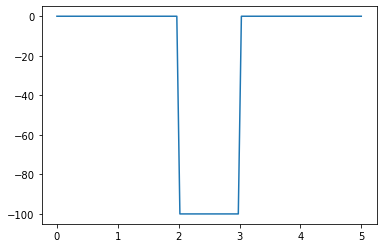

In [25]:
plt.plot(x,v)

In [26]:
h=np.zeros((n,n))
dx=x[1]-x[0]
d0=(-1/2)*(-2/dx**2)+v
a=np.ones(n-1)
d1=a*(-1/2)*(1/dx)**2
h0=np.diag(d1,1)
h1=np.diag(d1,-1)
h2=np.diag(d0)
h=h1+h2+h0
print(h)

#solution of well potential

[[ 392.04 -196.02    0.   ...    0.      0.      0.  ]
 [-196.02  392.04 -196.02 ...    0.      0.      0.  ]
 [   0.   -196.02  392.04 ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ...  392.04 -196.02    0.  ]
 [   0.      0.      0.   ... -196.02  392.04 -196.02]
 [   0.      0.      0.   ...    0.   -196.02  392.04]]


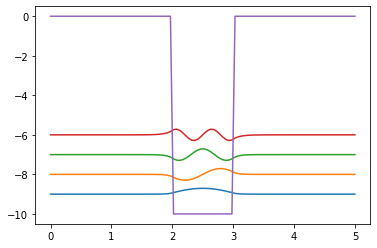

In [27]:
eigv,eigvect= np.linalg.eigh(h)
plt.plot(x,eigvect[:,0]-9)
plt.plot(x,eigvect[:,1]-8)
plt.plot(x,eigvect[:,2]-7)
plt.plot(x,eigvect[:,3]-6)
plt.plot(x,v/10)

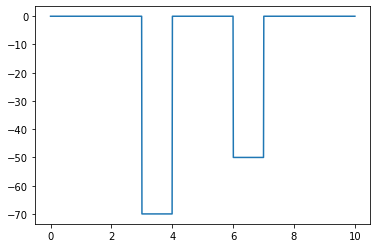

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
n=1000
x =np.linspace(0,10,n)
v=np.zeros(n)
j=-1
for i in x:
    
    j += 1
    if i < 3:
        v[j]=0
    if 3 < i < 4: 
        v[j]=-70
    if  4 < i < 6: 
        v[j]=0
    if 6 < i < 7:
        v[j]=-50
    if i > 7:
        v[j]=0
plt.plot(x,v)


In [39]:
n=1000
h=np.zeros((n,n))
dx=x[1]-x[0]
d0=(-1/2)*(2/dx**2)+v
a=np.ones(n-1)
d1=a*(-1/2)*(1/dx)**2
h0=np.diag(d1,1)
h1=np.diag(d1,-1)
h2=np.diag(d0)
h=h1+h2+h0
print(h)


[[-9980.01  -4990.005     0.    ...     0.        0.        0.   ]
 [-4990.005 -9980.01  -4990.005 ...     0.        0.        0.   ]
 [    0.    -4990.005 -9980.01  ...     0.        0.        0.   ]
 ...
 [    0.        0.        0.    ... -9980.01  -4990.005     0.   ]
 [    0.        0.        0.    ... -4990.005 -9980.01  -4990.005]
 [    0.        0.        0.    ...     0.    -4990.005 -9980.01 ]]


[-20026.42631756 -20015.76524521 -20006.6136066  -19998.48698462]


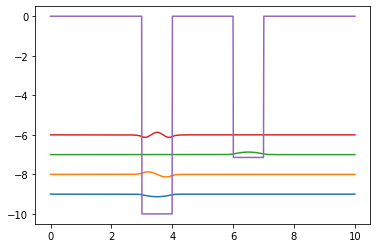

In [48]:
eigv,eigvect= np.linalg.eigh(h)
print(eigv[:4])
plt.plot(x,eigvect[:,0]-9)
plt.plot(x,eigvect[:,1]-8)
plt.plot(x,eigvect[:,2]-7)
plt.plot(x,eigvect[:,3]-6)
plt.plot(x,v/7)

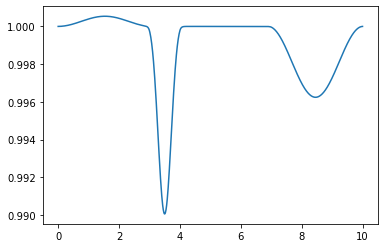

In [30]:

import scipy.integrate as integrate
eigv,eigvec= np.linalg.eigh(h)
xy=eigvect[:,0]
result =integrate.simpson(eigvec**2)
plt.plot(x,result)
#tried to integrate but didn't look good
plt.show()

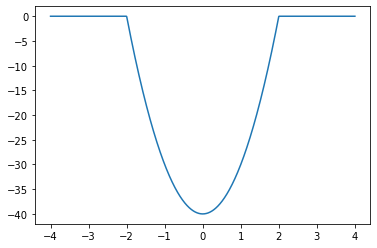

In [51]:
n=1000
k=20
x1 =np.linspace(-4,4,n)
y=np.zeros(n)

for i in range(len(x1)):
    if x1[i] >= -2 and x1[i] <= 2:
        y[i]=1/2*k*(x1[i]**2)-40
    
plt.plot(x1,y)

In [65]:
n=1000
h=np.zeros((n,n))
dx1=x1[1]-x1[0]
d0=(-1/2)*(-2/dx1**2)+y
a=np.ones(n-1)
d1=a*(-1/2)*(1/dx1)**2
h0=np.diag(d1,1)
h1=np.diag(d1,-1)
h2=np.diag(d0)
h=h1+h2+h0
print(h)

[[15593.765625  -7796.8828125     0.        ...     0.
      0.            0.       ]
 [-7796.8828125 15593.765625  -7796.8828125 ...     0.
      0.            0.       ]
 [    0.        -7796.8828125 15593.765625  ...     0.
      0.            0.       ]
 ...
 [    0.            0.            0.        ... 15593.765625
  -7796.8828125     0.       ]
 [    0.            0.            0.        ... -7796.8828125
  15593.765625  -7796.8828125]
 [    0.            0.            0.        ...     0.
  -7796.8828125 15593.765625 ]]


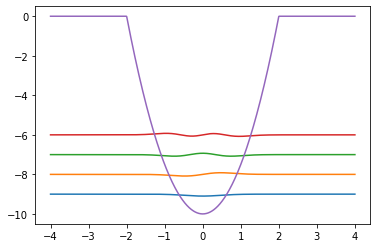

In [67]:
eigv,eigvect= np.linalg.eigh(h)
plt.plot(x1,eigvect[:,0]-9)
plt.plot(x1,eigvect[:,1]-8)
plt.plot(x1,eigvect[:,2]-7)
plt.plot(x1,eigvect[:,3]-6)

plt.plot(x1,y/4)



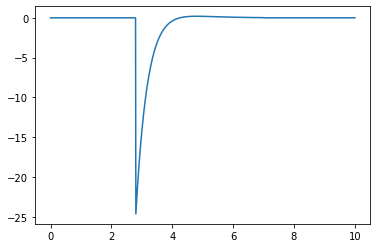

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import math
N = 1000
x2 = np.linspace(-5, 20, N)
y1=np.zeros(N)
D = -0.2
a = 0.5
r0 = 7
for i in range(0,N):
    if (x2[i] < 2):
        y1[i] = 0
    elif (2<=x[i]<=7):
        y1[i] = D * ((np.exp(-2*a*(x2[i]-r0))) - (2*(np.exp(-a*(x2[i]-r0)))))
    elif (x2[i] > 7):
        y1[i] = 0

plt.plot(x,y1)

In [85]:
h=np.zeros((n,n))
dx1=x1[1]-x1[0]
d0=(-1/2)*(-2/dx1**2)+y1
a=np.ones(n-1)
d1=a*(-1/2)*(1/dx1)**2
h0=np.diag(d1,1)
h1=np.diag(d1,-1)
h2=np.diag(d0)
h=h1+h2+h0
print(h)

[[15593.765625  -7796.8828125     0.        ...     0.
      0.            0.       ]
 [-7796.8828125 15593.765625  -7796.8828125 ...     0.
      0.            0.       ]
 [    0.        -7796.8828125 15593.765625  ...     0.
      0.            0.       ]
 ...
 [    0.            0.            0.        ... 15593.765625
  -7796.8828125     0.       ]
 [    0.            0.            0.        ... -7796.8828125
  15593.765625  -7796.8828125]
 [    0.            0.            0.        ...     0.
  -7796.8828125 15593.765625 ]]


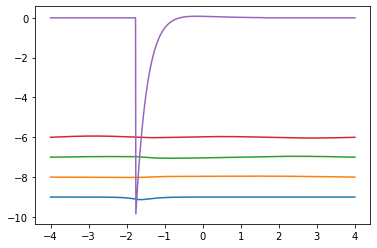

In [89]:
eigv,eigvect= np.linalg.eigh(h)
plt.plot(x1,eigvect[:,0]-9)
plt.plot(x1,eigvect[:,1]-8)
plt.plot(x1,eigvect[:,2]-7)
plt.plot(x1,eigvect[:,3]-6)

plt.plot(x1,y1/2.5)
